In [25]:
# Import necessary components 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt
from numpy import mean
from numpy import std
from numpy import array

In [26]:
# Import SARS and COVID csv files
# Only import 'date' and 'cumulative_cases' columns
canada_sars = pd.read_csv('./data/sars_canada.csv', header = 0, index_col = 0, usecols=['date', 'cumulative_cases'])
canada_covid = pd.read_csv('./data/covid_canada.csv', header = 0, index_col = 0, usecols=['date', 'cumulative_cases'])

# Given input data and how many training data it would be used,
# Split the input data into train and test data
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# Convert into data
data_train = canada_sars.values
data_test = canada_covid.values

In [27]:
# Defining a few functions that is needed
# These functions are used for RMSE calculation as well as walk-forward validation

# Shifting data to in order for an 'one-step forecast'
def shift_data(data, n_in = 1, n_out = 1):
    dataframe = pd.DataFrame(data)
    col = list()

    # Separate into two col, with one that is shifted forward
    for i in range(n_in, 0, -1):
        col.append(dataframe.shift(i))

    for i in range(0, n_out):
        col.append(dataframe.shift(-i))

    # Brings all result together and drop rows with NaN
    result = pd.concat(col, axis=1)
    result.dropna(inplace=True)

    return result.values

# Returns the RMSE (Root Mean Square Error) given the actual and predicted value
def calculate_error(actual, predicted):
	# print('Actual: ' + f'{actual[len(actual) - 1][0]}')
	# print('Predicted: %.0f' % (predicted[len(predicted) - 1][0]))

	# pyplot.plot(actual, label='Actual')
	# pyplot.plot(predicted, label='Predicted')
	# pyplot.legend()
	# pyplot.show()

	return sqrt(mean_squared_error(actual, predicted))

# This function does walk forward validation
# This is when the modal makes a one step forecast for each observation
def walk_forward_validation(test, train, config):
    prediction = list()

    # Fit model
    model = fit_model(train, config)

    # Set history
    history = [x for x in train]

    for i in range(len(test)):
        # Fit model and make a forecast for the history
        y_hat = predict_model(model, history, config)

        # Stores the forecast into a list
        prediction.append(y_hat)
        history.append(test[i])
    
    # Estimate error
    error = calculate_error(test, prediction)
    print('Error: ' + '%.3f' % error)

    return error

# Repeated evaluation
def repeat_evaluation(test, train, config, n_repeats):
    score_list = list()

    for i in range(n_repeats):
        print('\nIteration: %.0f' % (i + 1))
        score_list.append(walk_forward_validation(test, train, config));

    return score_list

# Summarize model
def summarize(name, score_list):
    score_m, score_std = mean(score_list), std(score_list)
    print('\n%s: %.3f RMSE (+/- %.3f)' % (name, score_m, score_std))

    # Create box and whisker plot
    pyplot.boxplot(score_list)
    pyplot.show()


Iteration: 1
Error: 10993.727

Iteration: 2
Error: 10993.727

Iteration: 3
Error: 10993.727

Iteration: 4
Error: 10993.727

Iteration: 5
Error: 10993.727

Iteration: 6
Error: 10993.727

Iteration: 7
Error: 10993.727

Iteration: 8
Error: 10993.727

Iteration: 9
Error: 10993.727

Iteration: 10
Error: 10993.727

CNN: 10993.727 RMSE (+/- 0.000)


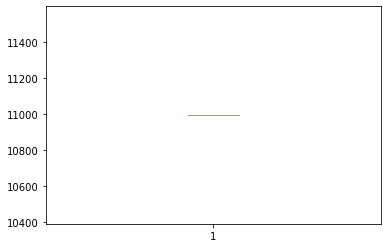

In [28]:
# Building the naive model using the following configuration
# This is use to help us establish a baseline RMSE in our testing

# Define and then fit the model
# Given the training data, and configuration, this function fits a model
def fit_model(train, config):
    return None

# Predict the model
# Given a model, the history, and configuration, this function predicts a model
def predict_model(model, history, config):
    values = list()
    for offset in config:
        values.append(history[-offset])

    return np.median(values)

# After defining the two functions needed to fit and predict the model, define the configuration
config = [14]

# Create and fit model
# Error is calculate throughout the entire prediction period
score_list = repeat_evaluation(data_test, data_train, config, 10)
summarize('Persistence', score_list)